## Linear Model Assumptions

Some of the linear regression model assumptions are:

- **Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

- **No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors. 

- **Normally distributed errors**: the residuals are random, normally distributed with a mean of 0.

- **Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

Examples of linear models are:

- Linear and Logistic Regression
- Linear Discriminant Analysis (LDA)


**Failure to meet one or more of the model assumptions could end up in a poor model performance**. In other words, the variables do not accurately predict the outcome, with a linear model.

If the assumptions are not met, we can:

- use a different no-linear model to predict the outcome from the variables
- transform the input variables so that they fulfill the assumptions.


### Determining if linear model is accurate

The main diagnostic to determine if a linear model works well to predict the outcome from the predictors, is to evaluate in the first place, if the error terms, or residuals follow a normal distribution with a mean of zero, and are homoscedastic. If this is true, we can be fairly confident that the model is doing a good job.

We can determine normal distribution and homoscedasticity as follows:

- Normal distribution can be assessed by Q-Q plots
- Homoscedasticity can be assessed by residuals plots


If we would also like to test the other assumptions:

- Linear regression can be assessed by scatter-plots and residuals plots
- Multi-colinearity can be assessed by correlation matrices


### If the assumptions are not met

Sometimes variable transformation can help the variables meet the model assumptions. We normally do 1 of 2 things:

- Mathematical transformation of the variables
- Discretisation


**I will cover mathematical transformations and discretisation in later sections of the course**. 


## In this demo...

We will:

- Train a linear model to predict a target from 3 predictor variables
- Evaluate if the model is accurate by examining the residuals
- Determine if the residuals are normally distributed
- If there is homoscedasticity
- We will then transform the data and see how this improves model performance
- We will then move on to examine Correlation and Linear relationship between variables and outcome

In [1]:
import pandas as pd
import numpy as np

#for ploting

import matplotlib.pyplot as plt
import seaborn as sns

#for Q-Q plots

import scipy.stats as stats

#for the dataset for the demo

from sklearn.datasets import load_boston

#for linear regression model
from sklearn.linear_model import LinearRegression

#to split and standarize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#to evalutate the regression model
from sklearn.metrics import mean_squared_error


In [2]:
#load the boston dataset
boston_dataset = load_boston()

#Creating a dataframe woth the independent variables
boston = pd.DataFrame(boston_dataset.data,
                         columns=boston_dataset.feature_names)

#add the target

boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# this is the information about the boston house prince dataset
# in case you would like to get familiar with the variables before 
# continuing with the notebook

# the aim is to predict the "Median house value (price)"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods



print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<h3> Building a linear model

In [4]:
# to train and evaluate the model, let's first split into
# train and test data, using 3 variables of choice:
# LSTAT, RM and CRIM

# let's separate into training and testing set
# using the sklearn function below

X_train, X_test, y_train, y_test = train_test_split(boston[['LSTAT','RM','CRIM']],
                                                    boston['MEDV'],
                                                    test_size = 0.30,
                                                    random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [5]:
# let's scale the features
# normal procedure for linear models
# I will explain this later in in the course

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
# let's build a linear model using the data as loaded from sklearn

# instantiate a lineear model

linreg = LinearRegression()

linreg.fit(scaler.transform(X_train), y_train)

LinearRegression()

In [7]:
# make predictions on the train set and calculate
# the mean squared error

print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print("Linear Regression Mean Squared Error : ", mean_squared_error(y_train, pred))

# make predictions on the test set and calculate
# the mean squared error
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print("Linear Regression Mean Squared Error : ", mean_squared_error(y_test, pred))


Train set
Linear Regression Mean Squared Error :  28.603232128198886
Test set
Linear Regression Mean Squared Error :  33.20006295308441


<h3>Calculate the residuals

In [8]:
#calculate the residuals

error = y_test - pred

<h3>Test residual normality

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

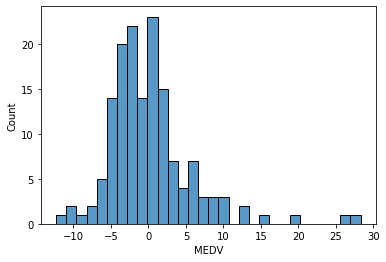

In [9]:
# we will make a histogram to determine if the residuals
# are normally distributed with mean value at 0

sns.histplot(error, bins =30)

We see that the residuals show a fairly normal distribution centered at 0. Not perfect, by visual inspection there is some skew towards the left, with a few higher unusual values towards the right of the distribution.

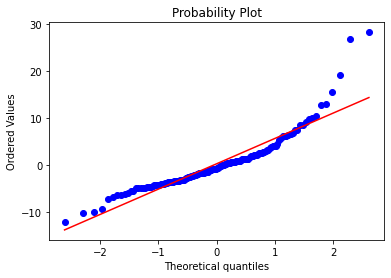

In [10]:
# we can better visualize residuals distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should adjust to the 45 degree line

stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot we see more easily how the residuals deviate from the red line towards the ends of the distribution, thus, they are not normally distributed.

## Homoscedasticity

Homoscedasticity implies that at each level of the predictor variable(s), the variance of the residual terms should be constant. So we need to plot the residuals against the variables.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot
- Levene’s test
- Barlett’s test
- Goldfeld-Quandt Test

But those escape the scope of this course. So for this demo I will focus on residual plot analysis.

Text(0, 0.5, 'Residuals')

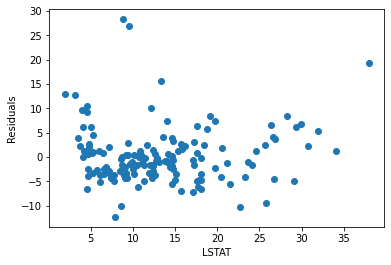

In [11]:
# plot the residuals vs one of the independent
# variables, LSTAT in this case

plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

Text(0, 0.5, 'Residuals')

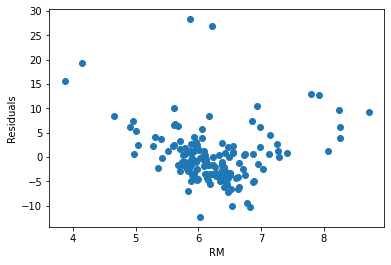

In [12]:
# let's plot the residuals vs RM
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

Text(0, 0.5, 'Residuals')

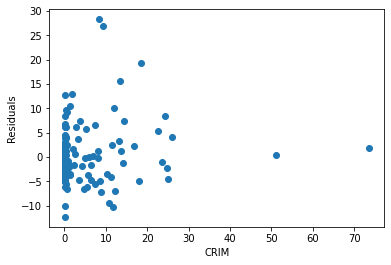

In [13]:
# plot the residuals vs one of the independent
# variables, CRIM in this case

plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

Most values of CRIM are skewed towards the left, so it is hard to say if the residuals show the same variance for all values of CRIM, because we have very few data points for CRIM when its values are high.

## Automating Residual analysis with Yellowbrick

# in this cell, I want to introduce the use of yellobrick
# a library for visualisation of machine learning model 
# performance

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression 

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

On the right, we have the distribution of the residuals in the train and test sets. We see that it is not perfectly centered at 0.

On the left, we have the residuals vs the predicted value, we also see that the variance is not constant. Towards the extremes of the predictions, the model is under-estimating the outcome (most residuals are negative). And towards the center of the predictions, the model is over-estimating the outcome. So the residuals variance is not constant for all values.

## Transform the data to improve model fit

We will use the Box-Cox transformation, which I will discuss in more detail in a later section in the course.

In [14]:
import scipy.stats as stats

# apply the box-cox transformation to the variables
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [15]:
# let's scale the features

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [16]:
#model build a new model using the transformed variables

#specify the model
linreg = LinearRegression()

#fit the model
linreg.fit(scaler.transform(X_train),y_train)

#make Prediction and calculate the mean squared 
#error over the train set

print('Train set')

pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse : {}'.format(mean_squared_error(y_train, pred)))

#make predictions and calculate the mean squared 
#error over the test set

print('Test set')
pred = linreg.predict(scaler.transform(X_test))
print("Linear Regression mse: {}".format(mean_squared_error(y_test, pred)))
print()

Train set
Linear Regression mse : 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992



<h3> Calculate residual

In [17]:
#calculate the residuals

error = y_test - pred

<h3>Residual normality

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

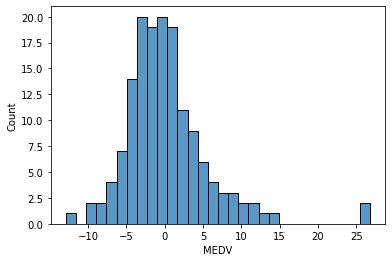

In [18]:
#we will make a histogram to determine if the residuals 
#are normally distributed with mean value at 0

sns.histplot(error, bins=30)

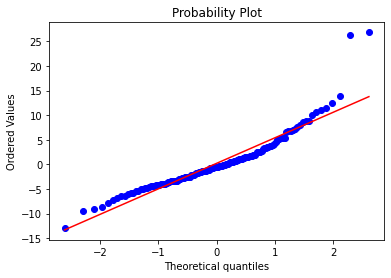

In [19]:
# we can better visualize residuasl distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should adjust to the 45 degree line

stats.probplot(error, dist="norm", plot=plt)
plt.show()

We see an improvement: the residuals are now "more" normally distributed.

In [ ]:
# let's now do the analysis with yellowbrick

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We can see a noticeable improvement in the distribution of the residuals, now better centered at 0, and with a more even variance across all values of the prediction.

**HOMEWORK**

Plot the residuals vs the transformed variables to determine homoscedasticity.

**NOTE**

The model performance would improve even further if we transformed the target as well. I leave that to you.

Text(0, 0.5, 'Residuals')

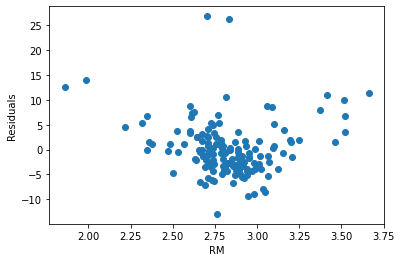

In [20]:
# let's plot the residuals vs RM
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

## Testing other model assumptions

If we have time, and want to better understand the relationships between our variables among themselves and the outcome, we can go ahead and check the linear relationship and colinearity.

In [21]:
# I will create a dataframe with the variable x that
# follows a normal distribution and shows a
# linear relationship with y

# this will provide the expected plots
# i.e., how the plots should look like if the
# assumptions are met

np.random.seed(29)

n = 200
x= np.random.randn(n)
y = x*10 + np.random.randn(n)*2

toy_df = pd.DataFrame([x,y]).T
toy_df.columns = ['x','y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


## Linear relationship

We evaluate linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

### Scatter plots

Text(0.5, 20.80000000000002, 'Independent variable')

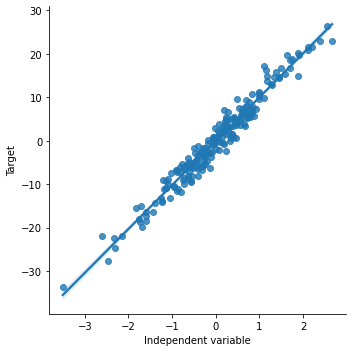

In [30]:
# with the simulated data

# this is how the plot looks like when
# there is a linear relationship

sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

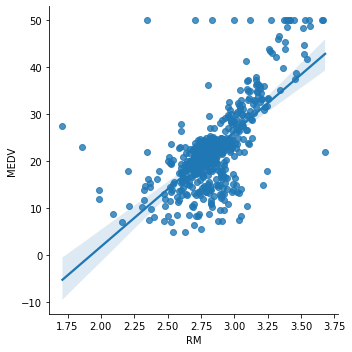

In [31]:
# now we make a scatter plot for the boston
# house price dataset

# (remember that we transformed the variables already)

# we plot LAST (% lower status of the population)
# vs MEDV (median value of the house)

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

The relationship between LSTAT and MEDV is fairly linear apart from a few values around the minimal values of LSTAT, towards the top left side of the plot.

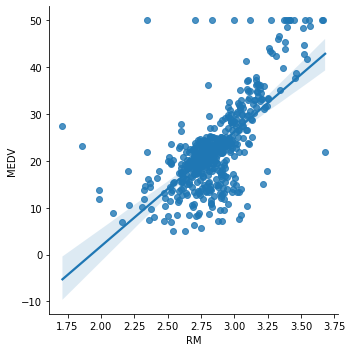

In [32]:
# now we plot RM (average number of rooms per dwelling)
# vs MEDV (median value of the house)

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)